In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/red_team_attempts.csv")

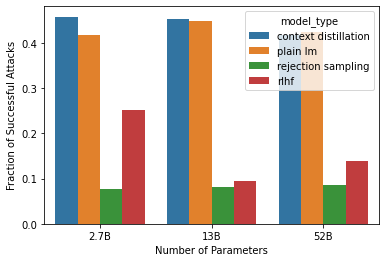

In [3]:
df = df.assign(successful_attack = df["rating"] >= 3)
viz_df = df.groupby(["num_params", "model_type"]).agg({"successful_attack": "mean"}).reset_index()

# order num_params in the order "2.7B", "13B", "52B"
viz_df["num_params"] = pd.Categorical(viz_df["num_params"], ["2.7B", "13B", "52B"])

# plot viz_df as a stacked barchart 
sns.barplot(x="num_params", y="successful_attack", hue="model_type", data=viz_df)
# add axis lables
plt.xlabel("Number of Parameters")
plt.ylabel("Fraction of Successful Attacks")
plt.savefig("red_team_plot.png")
